# General overview of the data 

 ## In this script I'm computing:
    1. the time from neuropsych report to testing
    2. Distribution of anxiety and depression in the sample
    3. correlation between depression and anxiety
    4. pariwise correlations between demographic variables

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

Report dates not available for UTSW
median = 226.0 days


Text(226.0, 15, '  Median: 7.5 months')

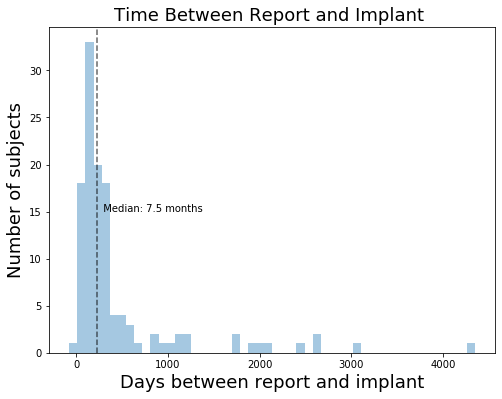

In [2]:
#Set to 'All' for aggregate data or a specific site name for site-only data
site = 'All'
sd = {'Jefferson', 'Dartmouth', 'Emory', 'UTSW'}

if (site != 'All'):
#     df = pd.read_excel(r'./' + site + '_neuropsych.xlsx')
    df = pd.read_excel(r'./' + site + '_neuropsych.xlsx',engine="openpyxl")
time_gap = []

#Will only include sites that have date of report extracted from REDCap
if site == 'All':
    for k in sd:
        try:
            df = pd.read_excel(r'./' + k + '_neuropsych.xlsx',engine="openpyxl")
            for i in df.index:
                gap = df.iloc[i]['Time between report and implant (days)']
                if np.isnan(gap)==False:
                    time_gap.append(gap)
        except:
            print('Report dates not available for', k)
else:
    for i in df.index:
        gap = df.iloc[i]['Time between report and implant (days)']
        if np.isnan(gap)==False:
            time_gap.append(gap)
    
mean = np.mean(time_gap)
med = np.median(time_gap)
    
plt.figure(figsize=(8,6))
time_hist = plt.hist(time_gap, 50,alpha=0.4)
plt.xlabel('Days between report and implant',fontsize=18)
plt.ylabel('Number of subjects',fontsize=18)
# plt.title('Time Between Report and Implant: '+ site,fontsize=18)
plt.title('Time Between Report and Implant ',fontsize=18)

# plt.axvline(x=mean, color='k', linestyle='--',alpha=0.5)
plt.axvline(x=med, color='k', linestyle='--',alpha=0.6)
# print('mean =', mean, 'days')
print('median =', med, 'days')
plt.text(med,15,'  Median: %.1f months' %(med/30))

In [41]:
# norep = []
# oldrep = []

# df
# for i in df.index:
#     typ = df.iloc[i]['Date of Report']
#     gap = df.iloc[i]['Time between report and implant (days)']
#     if typ=='None':
#         norep.append(df.iloc[i]['Subject Number'])
#     if gap > 182:
#         oldrep.append(df.iloc[i]['Subject Number'])
# len(oldrep)

In [6]:
# load
import pickle
with open('/home1/noaherz/Mental_health5/results/df_master','rb') as pickle_file:
    df_master=pickle.load(pickle_file)


In [7]:
print('number of BAI scores:',len(df_master) - sum(np.isnan(df_master['BAI'])))
print('number of BDI scores:',len(df_master) - sum(np.isnan(df_master['BDI'])))
both_vals=df_master.dropna(subset=['BAI','BDI'])
print('number of both BAI and BDI scores:',len(both_vals['subject'].unique()))

number of BAI scores: 405
number of BDI scores: 479
number of both BAI and BDI scores: 120


In [8]:
fig_path = '/home1/noaherz/Mental_health5/figures'

## Plot depression historgram

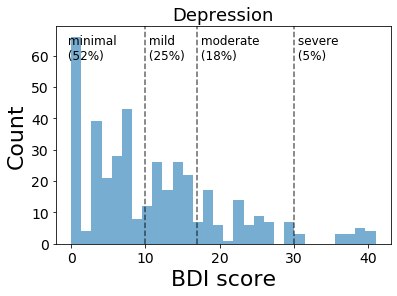

In [27]:

plt.hist(both_vals['BDI'], 30,alpha=0.6)
plt.xlabel('BDI score',fontsize=22)
plt.ylabel('Count',fontsize=22)
plt.title('Depression',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# scores from 0 to 9 represent minimal depressive symptoms, scores of 10 to 16 indicate mild depression, scores of 17 to 29 indicate moderate depression, and scores of 30 to 63 indicate severe depression.
# cutoffs
mild=10
moderate=17
severe=30

# compute percentage
min_perc=(np.sum(np.logical_and(np.array(both_vals['BDI'])>=0,np.array(both_vals['BDI'])<mild))/len(both_vals['BDI']))*100
mild_perc=(np.sum(np.logical_and(np.array(both_vals['BDI'])>=mild,np.array(both_vals['BDI'])<moderate))/len(both_vals['BDI']))*100
moderate_perc=(np.sum(np.logical_and(np.array(both_vals['BDI'])>=moderate,np.array(both_vals['BDI'])<severe))/len(both_vals['BDI']))*100
severe_perc=(np.sum(np.array(both_vals['BDI'])>=severe)/len(both_vals['BDI']))*100

plt.text(-1,59,' minimal \n (%.0f%%)' %min_perc,fontsize=12)
plt.text(mild,59,' mild \n (%.0f%%)' %mild_perc,fontsize=12)
plt.text(moderate,59,' moderate \n (%.0f%%)' %moderate_perc,fontsize=12)
plt.text(severe,59,' severe \n (%.0f%%)' %severe_perc,fontsize=12)
plt.axvline(mild, color='k', linestyle='--',alpha=0.6)
plt.axvline(moderate, color='k', linestyle='--',alpha=0.6)
plt.axvline(severe, color='k', linestyle='--',alpha=0.6)

# plt.savefig(f"{fig_path}/depression_hist.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08, format='pdf')


## Plot anxiety historgram

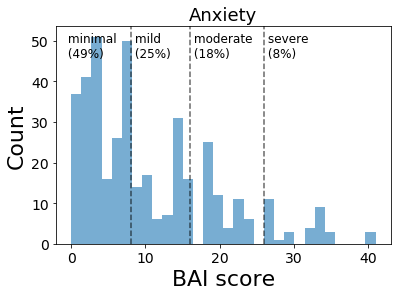

In [28]:

plt.hist(both_vals['BAI'], 30,alpha=0.6)
plt.xlabel('BAI score',fontsize=22)
plt.ylabel('Count',fontsize=22)
plt.title('Anxiety',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# cutoffs scores
mild=8
moderate=16
severe=26

# compute percentage
min_perc=(np.sum(np.logical_and(np.array(both_vals['BAI'])>=0,np.array(both_vals['BAI'])<mild))/len(both_vals['BAI']))*100
mild_perc=(np.sum(np.logical_and(np.array(both_vals['BAI'])>=mild,np.array(both_vals['BAI'])<moderate))/len(both_vals['BAI']))*100
moderate_perc=(np.sum(np.logical_and(np.array(both_vals['BAI'])>=moderate,np.array(both_vals['BAI'])<severe))/len(both_vals['BAI']))*100
severe_perc=(np.sum(np.array(both_vals['BAI'])>=severe)/len(both_vals['BAI']))*100

plt.text(-1,46,' minimal \n (%.0f%%)' %min_perc,fontsize=12)
plt.text(mild,46,' mild \n (%.0f%%)' %mild_perc,fontsize=12)
plt.text(moderate,46,' moderate \n (%.0f%%)' %moderate_perc,fontsize=12)
plt.text(severe,46,' severe \n (%.0f%%)' %severe_perc,fontsize=12)
plt.axvline(mild, color='k', linestyle='--',alpha=0.6)
plt.axvline(moderate, color='k', linestyle='--',alpha=0.6)
plt.axvline(severe, color='k', linestyle='--',alpha=0.6)

# plt.savefig(f"{fig_path}/anxiety_hist.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08, format='pdf')


### Compute Pearson correlation between anxiety and depression

In [11]:
% cd /home1/noaherz/Mental_health5/
from false_memory_functions import *

/home1/noaherz/Mental_health5


/home1/noaherz/.conda/envs/cml3/lib/python3.7/site-packages/ptsa/data/timeseries.py:487: FutureWarning: xarray subclass TimeSeriesX should explicitly define __slots__
  class TimeSeriesX(TimeSeries):
/home1/noaherz/.conda/envs/cml3/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [12]:
# load
import pickle
with open('/home1/noaherz/Mental_health5/results/df_master','rb') as pickle_file:
    df_master=pickle.load(pickle_file)


In [13]:
df_master=df_master.dropna(subset=['BDI', 'BAI'])
len(df_master)

404

In [14]:
len(df_master['subject'].unique())

120

demographic and neuropsych information is similar across sessions. Take only a single value per subject:

In [15]:
sub_level_df = pd.DataFrame([]) 
for sub in df_master['subject'].unique():
    sub_data = df_master[df_master['subject']==sub]
    assert np.max(sub_data['BAI']) == np.min(sub_data['BAI']) # Check if all items in the array are equal
    assert np.max(sub_data['BDI']) == np.min(sub_data['BDI'])
    sub_level_df=sub_level_df.append({'subject': sub_data.iloc[0]['subject'], 'BDI':sub_data.iloc[0]['BDI'], 'BAI':sub_data.iloc[0]['BAI'],
                                     'gender':sub_data.iloc[0]['gender'],'age_of_seizure_onset':sub_data.iloc[0]['age_of_seizure_onset'],
                                     'IQ':sub_data.iloc[0]['IQ'],'age_at_implant':sub_data.iloc[0]['age_at_implant'],
                                     'binary_prior_neuro':sub_data.iloc[0]['binary_prior_neuro']},ignore_index=True )


In [16]:
sub_level_df

,BAI,BDI,IQ,age_at_implant,age_of_seizure_onset,binary_prior_neuro,gender,subject
0,8.0,2.0,72.0,48.105026,20.0,1.0,Female,R1001P
1,9.0,0.0,86.0,49.383743,34.0,1.0,Female,R1002P
2,7.0,7.0,83.0,20.553582,18.0,1.0,Female,R1006P
3,2.0,1.0,92.0,30.801454,22.0,1.0,Female,R1010J
4,2.0,12.0,98.0,36.581290,12.0,0.0,Female,R1013E
...,...,...,...,...,...,...,...,...
115,18.0,16.0,105.0,38.839949,22.0,0.0,Male,R1530J
116,12.0,21.0,71.0,53.682143,31.0,1.0,Female,R1533J
117,24.0,17.0,102.0,30.593487,13.0,0.0,Female,R1536J
118,2.0,7.0,114.0,29.281915,22.0,0.0,Male,R1542J


LR test, 0.530, p value:, 0.00000000, N = 120


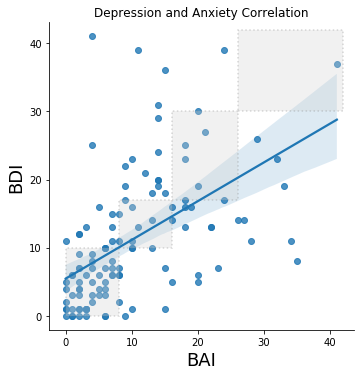

In [20]:

sns.lmplot(x="BAI", y="BDI", data=sub_level_df);
plt.xlabel("BAI",fontsize=18)
plt.ylabel("BDI",fontsize=18);
plt.title("Depression and Anxiety Correlation")

# correlation:
r,p=stats.pearsonr(sub_level_df['BAI'], sub_level_df['BDI'])
print('LR test, {:.3f}, p value:, {:.8f}, N = {:.0f}'.format(r, p, len(sub_level_df)))

# Anxiety cutoffs
mild=8
moderate=16
severe=26
# Depression cutoffs
mild=10
moderate=17
severe=30

rect = plt.Rectangle((26,30),max(sub_level_df['BAI'])-25,max(sub_level_df['BDI'])-29,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # severe cases
rect1 = plt.Rectangle((16,17),26-16,30-17,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # moderate cases
rect2 = plt.Rectangle((8,10),16-8,17-10,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # mild cases
rect3 = plt.Rectangle((0,0),8,10,linewidth=1.5,fill=True,alpha=0.3,facecolor='lightgrey', edgecolor='grey',linestyle=':') # without depression/anxiety

# Add the patch to the Axes
plt.gca().add_patch(rect)
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)


### Pairwise correlation between demographic variables

Check for problems of multicollinearity.
See Ada's paper that adresses this issue: https://memory.psych.upenn.edu/files/pubs/AkaEtal21.pdf

In [19]:
sub_level_df.corr('pearson')

,BAI,BDI,IQ,age_at_implant,age_of_seizure_onset,binary_prior_neuro
BAI,1.000000,0.529718,0.005267,0.080015,0.167275,0.033852
BDI,0.529718,1.000000,0.023126,0.281204,0.182115,0.077575
IQ,0.005267,0.023126,1.000000,-0.037334,-0.013810,-0.081702
age_at_implant,0.080015,0.281204,-0.037334,1.000000,0.523318,0.133299
age_of_seizure_onset,0.167275,0.182115,-0.013810,0.523318,1.000000,0.303731
binary_prior_neuro,0.033852,0.077575,-0.081702,0.133299,0.303731,1.000000


Add the time difference between current age and age at seizure onset. 
The correlation between age and the time difference should be lower relative to the correlation between age and age at seizure onset.

In [21]:
# add time difference
time_from_seizure_onset = sub_level_df['age_at_implant'] - sub_level_df['age_of_seizure_onset']
sub_level_df['time_from_seizure_onset'] = time_from_seizure_onset
sub_level_df.corr('pearson') # check the new correlation

,BAI,BDI,IQ,age_at_implant,age_of_seizure_onset,binary_prior_neuro,time_from_seizure_onset
BAI,1.000000,0.529718,0.005267,0.080015,0.167275,0.033852,-0.106500
BDI,0.529718,1.000000,0.023126,0.281204,0.182115,0.077575,0.064904
IQ,0.005267,0.023126,1.000000,-0.037334,-0.013810,-0.081702,-0.016846
age_at_implant,0.080015,0.281204,-0.037334,1.000000,0.523318,0.133299,0.376015
age_of_seizure_onset,0.167275,0.182115,-0.013810,0.523318,1.000000,0.303731,-0.592826
binary_prior_neuro,0.033852,0.077575,-0.081702,0.133299,0.303731,1.000000,-0.219926
time_from_seizure_onset,-0.106500,0.064904,-0.016846,0.376015,-0.592826,-0.219926,1.000000


In [64]:
small_df = sub_level_df.drop(columns=['BAI','BDI','age_of_seizure_onset'])
small_df.corr('pearson') # check the new correlation

,IQ,age_at_implant,binary_prior_neuro,time_from_seizure_onset
IQ,1.000000,-0.037334,-0.081702,-0.016846
age_at_implant,-0.037334,1.000000,0.133299,0.376015
binary_prior_neuro,-0.081702,0.133299,1.000000,-0.219926
time_from_seizure_onset,-0.016846,0.376015,-0.219926,1.000000


Check p-values of the correlation

In [62]:

continous_sub_level_df = sub_level_df.drop(columns=['gender','subject','BDI','BAI','age_at_implant'])
corr_mat = pd.DataFrame([])
corr_mat1 = pd.DataFrame([])

for column_name1 in continous_sub_level_df.columns:
    for column_name2 in continous_sub_level_df.columns:
        new_df=sub_level_df.dropna(subset=[column_name1,column_name2])
        r,p=stats.pearsonr(new_df[column_name1],new_df[column_name2])
        corr_mat = corr_mat.append({'var1': column_name1, 'var2':column_name2,
                                    'p_val': p, 'r':r},ignore_index=True )
        corr_mat1 = corr_mat.append({column_name1: column_name1, 'var2':column_name2,
                                    'p_val': p, 'r':r},ignore_index=True )

corr_mat

,p_val,r,var1,var2
0,0.000000e+00,1.000000,IQ,IQ
1,8.861419e-01,-0.013810,IQ,age_of_seizure_onset
2,3.939553e-01,-0.081702,IQ,binary_prior_neuro
3,8.619709e-01,-0.016846,IQ,time_from_seizure_onset
4,8.861419e-01,-0.013810,age_of_seizure_onset,IQ
5,0.000000e+00,1.000000,age_of_seizure_onset,age_of_seizure_onset
6,8.269905e-04,0.303731,age_of_seizure_onset,binary_prior_neuro
7,1.897307e-12,-0.592826,age_of_seizure_onset,time_from_seizure_onset
8,3.939553e-01,-0.081702,binary_prior_neuro,IQ
9,8.269905e-04,0.303731,binary_prior_neuro,age_of_seizure_onset


### Check if anxiety predicts intrusions beyond depression using lmm

Anxiety predicts intrusions beyond depression, but not the otherway around

In [70]:
df_master = df_master.dropna(subset=['average_total_ints'])

In [71]:
# what's the difference between: df_master[['average_total_ints','total ints']]

vc = {'session': '0 + C(session)'} #the vc formula always varies within the groups parameter, so it will vary within subject 
# If we want to use list as another nested variable, we can use this:
# vc = {'session': '0 + C(session)', 'list': '0 + C(list):C(session)'}

## Total number of intrusions:
model = sm.MixedLM.from_formula('average_total_ints ~ BDI',vc_formula=vc,  groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_one_var =result.llf #log likelihood
print(result.summary())

# Experiment main effect
model = sm.MixedLM.from_formula('average_total_ints ~ BDI + BAI',vc_formula=vc, groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_full =result.llf #log likelihood
print(result.summary())

# Likelihood ratio tests for main effects
print('Main effect of anxiety on total intrusions')
lr, p = lrtest(llf_one_var, llf_full, df = 1) # Degrees of freedom = number of regressors (i.e. columns in summary table) added when including the effect of interest, for categorical variable with two groups this is df = 1
print('LR test, p value: {:.4f}, {:.30f}'.format(lr, p))

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_ints
No. Observations: 401     Method:             ML                
No. Groups:       120     Scale:              0.2375            
Min. group size:  1       Log-Likelihood:     -484.8649         
Max. group size:  10      Converged:          Yes               
Mean group size:  3.3                                           
------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
------------------------------------------------------------------
Intercept      0.935      0.071   13.114   0.000    0.795    1.074
BDI            0.006      0.005    1.218   0.223   -0.004    0.016
session Var    0.483      0.284                                   

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_ints
No. Observations: 401     Method:       

Both anxiety and depression uniquly predict correct-recalls

In [72]:
# what's the difference between: df_master[['average_total_ints','total ints']]

vc = {'session': '0 + C(session)'} #the vc formula always varies within the groups parameter, so it will vary within subject 
# If we want to use list as another nested variable, we can use this:
# vc = {'session': '0 + C(session)', 'list': '0 + C(list):C(session)'}

## Total number of intrusions:
model = sm.MixedLM.from_formula('average_total_recalls ~ BDI',vc_formula=vc,  groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_one_var =result.llf #log likelihood
print(result.summary())

# Experiment main effect
model = sm.MixedLM.from_formula('average_total_recalls ~ BDI + BAI',vc_formula=vc, groups='subject', data=df_master) 
result=model.fit(reml=False, method='nm')
llf_full =result.llf #log likelihood
print(result.summary())

# Likelihood ratio tests for main effects
print('Main effect of anxiety on correct recalls')
lr, p = lrtest(llf_one_var, llf_full, df = 1) # Degrees of freedom = number of regressors (i.e. columns in summary table) added when including the effect of interest, for categorical variable with two groups this is df = 1
print('LR test, p value: {:.4f}, {:.30f}'.format(lr, p))

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_recalls
No. Observations: 401     Method:             ML                   
No. Groups:       120     Scale:              2.6532               
Min. group size:  1       Log-Likelihood:     -795.6549            
Max. group size:  10      Converged:          Yes                  
Mean group size:  3.3                                              
---------------------------------------------------------------------
                 Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------
Intercept         5.051      0.141   35.708   0.000    4.774    5.328
BDI              -0.010      0.010   -0.988   0.323   -0.029    0.010
session Var       0.454      0.367                                   

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: average_total_recal